In [1]:
import sys
sys.path.append('..')
import simtools as st

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

import discretisedfield as df
import discretisedfield.tools as dft

# Two Bloch points

## Head-to-head and head-to-head (HH-HH)

In [3]:
hh_hh = st.Strip(
    length=400e-9,
    width=100e-9,
    htop=10e-9,
    hbottom=20e-9,
    dirname='.',
    initpattern='ii')
hh_hh.min_drive(fixed=True)
hh_hh.min_drive()
bp2s = hh_hh.system.m

Running OOMMF (ExeOOMMFRunner)[2022/03/07 09:31]... (31.2 s)
Running OOMMF (ExeOOMMFRunner)[2022/03/07 09:32]... (55.8 s)


## Head-to-head and tail-to-tail (HH-TT)

In [4]:
hh_tt = st.Strip(
    length=400e-9,
    width=100e-9,
    htop=10e-9,
    hbottom=20e-9,
    dirname='.',
    initpattern='io')
hh_tt.min_drive(fixed=True)
hh_tt.min_drive()
bp2o = hh_tt.system.m

Running OOMMF (ExeOOMMFRunner)[2022/03/07 09:33]... (59.6 s)
Running OOMMF (ExeOOMMFRunner)[2022/03/07 09:34]... (82.1 s)


## Figure

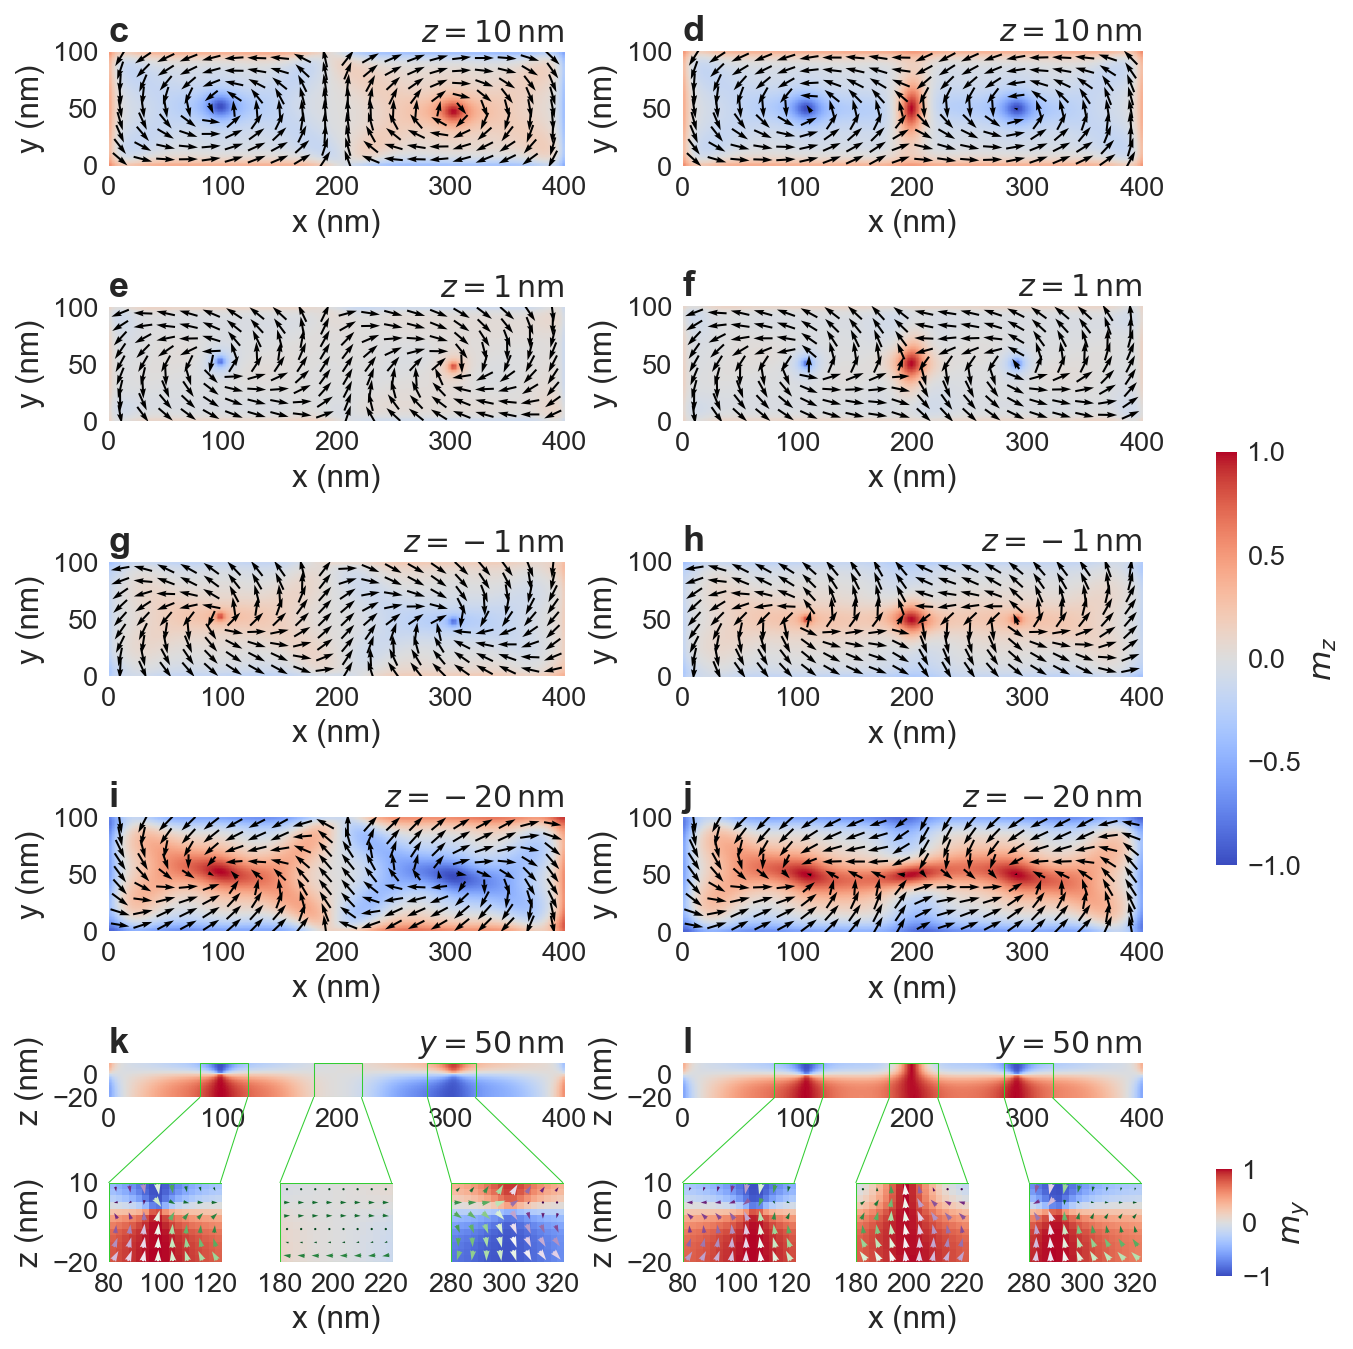

In [5]:
nx = 20
ny = 9
nz = 12

plot_opts = dict(clim=[-1,1], colorbar=False, cmap='coolwarm')

fig, ax = plt.subplot_mosaic([['oxy_tt', 'oxy_tt', 'oxy_tt', 'sxy_tt', 'sxy_tt', 'sxy_tt'],
                              ['oxy_ti', 'oxy_ti', 'oxy_ti', 'sxy_ti', 'sxy_ti', 'sxy_ti'],
                              ['oxy_bi', 'oxy_bi', 'oxy_bi', 'sxy_bi', 'sxy_bi', 'sxy_bi'],
                              ['oxy_bb', 'oxy_bb', 'oxy_bb', 'sxy_bb', 'sxy_bb', 'sxy_bb'],
                              ['oxz',    'oxz',    'oxz',    'sxz',    'sxz',    'sxz'],
                              ['oxz_l',  'oxz_m',  'oxz_r',  'sxz_l',  'sxz_m',  'sxz_r']],
                             figsize=(10, 9),
                             gridspec_kw={'height_ratios': [2, 2, 2, 2, 1, 1.7]},
                             constrained_layout=True, dpi=150)

letters = [chr(ord('c') + i) for i in range(10)]

i = 0
for z, label in zip([10, 1, -1, -20], ['tt', 'ti', 'bi', 'bb']):
    for config, field in zip(['o', 's'], [bp2o, bp2s]):
        field.orientation.plane(z=z*1e-9).z.mpl.scalar(ax=ax[f'{config}xy_{label}'], **plot_opts)
        field.orientation.plane(z=z*1e-9, n=(nx, ny)).mpl.vector(ax=ax[f'{config}xy_{label}'], use_color=False)
        ax[f'{config}xy_{label}'].annotate(f'{letters[i]}', xy=(0, 1), xycoords='axes fraction', xytext=(0, 5), textcoords='offset points', fontsize='xx-large', fontweight='bold')
        ax[f'{config}xy_{label}'].annotate(rf'$z={z}\,\mathrm{{nm}}$', xy=(1, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='x-large', ha='right')
        i += 1

# xz plane
bp2o.orientation.plane('y').z.mpl(ax=ax['oxz'], scalar_kw=plot_opts)
ax['oxz'].annotate(f'{letters[i]}', xy=(0, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='xx-large', fontweight='bold')
ax['oxz'].annotate(r'$y=50\,\mathrm{nm}$', xy=(1, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='x-large', ha='right')
ax['oxz'].set_xlabel(None)
i += 1

bp2s.orientation.plane('y').z.mpl(ax=ax['sxz'], scalar_kw=plot_opts)
ax['sxz'].annotate(f'{letters[i]}', xy=(0, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='xx-large', fontweight='bold')
ax['sxz'].annotate(r'$y=50\,\mathrm{nm}$', xy=(1, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='x-large', ha='right')
ax['sxz'].set_xlabel(None)


srl = df.Region(p1=(80e-9, 0, -20e-9), p2=(122.5e-9, 100e-9, 10e-9))
srm = df.Region(p1=(180e-9, 0, -20e-9), p2=(222.5e-9, 100e-9, 10e-9))
srr = df.Region(p1=(280e-9, 0, -20e-9), p2=(322.5e-9, 100e-9, 10e-9))

for sr, label in [(srl, 'l'), (srm, 'm'), (srr, 'r')]:
    for config, field in zip(['o', 's'], [bp2o, bp2s]):
        ax_i = ax[f'{config}xz_{label}']
        field[sr].orientation.plane('y').z.mpl.scalar(ax=ax_i, **plot_opts)
        field[sr].orientation.plane('y', n=(8, 6)).mpl.vector(ax=ax_i, colorbar=False, scale=10, cmap='PRGn', width=.022, clim=[-1, 1])
        if label != 'l':
            ax_i.set_yticklabels([])
            ax_i.set_ylabel(None)
        else:
            ax_i.set_yticks([-20, 0, 10])
        if label != 'm':
            ax_i.set_xlabel(None)
        ax_i.set_xmargin(0)
        
        px, py = sr.p1[0] * 1e9, sr.p1[2] * 1e9
        l, h = sr.edges[0] * 1e9, sr.edges[2] * 1e9
        color = 'limegreen'
        ax_i.add_patch(plt.Rectangle((px, py), l, h, facecolor='none', edgecolor=color, lw=.5))
        ax[f'{config}xz'].add_patch(plt.Rectangle((px, py), l, h, facecolor='none', edgecolor=color, lw=.5))
        
        for x in [round(sr.p1[0] * 1e9), round(sr.p2[0] * 1e9)]:
            con = ConnectionPatch(xyA=(x, -20), coordsA=ax[f'{config}xz'].transData, xyB=(x, 10), coordsB=ax[f'{config}xz_{label}'].transData)
            con.set(linewidth=.5, color=color)
            fig.add_artist(con)


im = ax['sxz'].get_images()[0]
fig.colorbar(im, ax=list(ax.values()), label=r'$m_z$', shrink=.5, aspect=20, fraction=.02, use_gridspec=True)

im = ax['oxz_m'].get_children()[0]
fig.colorbar(im, ax=[ax[f'{config}xz_{label}'] for label in ['l', 'm', 'r'] for config in ['o', 's']], label=r'$m_y$', fraction=0.02, aspect=7, shrink=.65, use_gridspec=True)

fig.set_constrained_layout_pads(w_pad=.5 / 72, h_pad=.5 / 72, hspace=0, wspace=0)

# Classification

In [6]:
F_div = dft.emergent_magnetic_field(bp2s.orientation).div
F_red = df.integral(F_div * df.dy * df.dz, direction='yz')
F_int = df.integral(F_red * df.dx, direction='x', improper=True)

bp2s_int = (F_int / (4 * np.pi)).array.squeeze()
bp2s_number = bp2s_int.round()
bp2s_count = bp2s_number[1:] - bp2s_number[:-1]

In [7]:
F_div = dft.emergent_magnetic_field(bp2o.orientation).div
F_red = df.integral(F_div * df.dy * df.dz, direction='yz')
F_int = df.integral(F_red * df.dx, direction='x', improper=True)

bp2o_int = (F_int / (4 * np.pi)).array.squeeze()
bp2o_number = bp2o_int.round()
bp2o_count = bp2o_number[1:] - bp2o_number[:-1]

In [8]:
xvals = np.arange(bp2o.mesh.region.pmin[0], bp2o.mesh.region.pmax[0], bp2o.mesh.dx) * 1e9

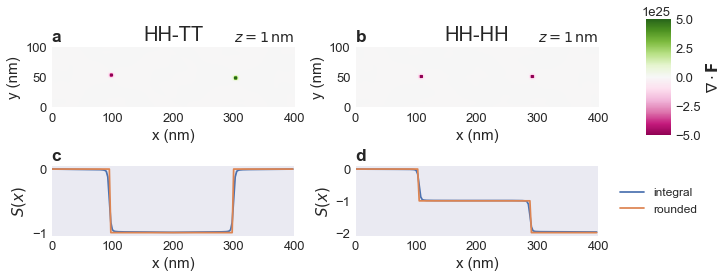

In [9]:
plot_opts = dict(clim=[-5e25, 5e25], colorbar=False, cmap='PiYG')

fig, axs = plt.subplot_mosaic([['oxy', 'sxy', 'cb'], ['oc', 'sc', 'legend']], figsize=(10, 3*1.25), constrained_layout=True,
                             gridspec_kw={'width_ratios': (10,10,1), 'height_ratios': (10, 6)})

em_div = dft.emergent_magnetic_field(bp2s.orientation).div
em_div.plane(z=1e-9).mpl(ax=axs['sxy'], scalar_kw=plot_opts)
axs['sxy'].set_title('HH-HH')
axs['sxy'].annotate('b', xy=(0, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='xx-large', fontweight='bold')
axs['sxy'].annotate(r'$z=1\,\mathrm{nm}$', xy=(1, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='x-large', ha='right')

em_div = dft.emergent_magnetic_field(bp2o.orientation).div
em_div.plane(z=1e-9).mpl(ax=axs['oxy'], scalar_kw=plot_opts)
axs['oxy'].set_title('HH-TT')
axs['oxy'].annotate('a', xy=(0, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='xx-large', fontweight='bold')
axs['oxy'].annotate(r'$z=1\,\mathrm{nm}$', xy=(1, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='x-large', ha='right')

im = axs['sxy'].get_images()[0]
fig.colorbar(im, cax=axs['cb'], label=r'$\nabla \cdot \mathbf{F}$')


axs['sc'].plot(xvals, bp2s_int, label='integral')
axs['sc'].plot(xvals, bp2s_number)
axs['sc'].set_yticks([-2, -1, 0])
axs['sc'].annotate('d', xy=(0, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='xx-large', fontweight='bold')

int_handle = axs['oc'].plot(xvals, bp2o_int, label='integral')
round_handle = axs['oc'].plot(xvals, bp2o_number, label='rounded')
axs['oc'].set_yticks([-1, 0])
axs['oc'].annotate('c', xy=(0, 1), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', fontsize='xx-large', fontweight='bold')

handles, labels = axs['oc'].get_legend_handles_labels()

axs['legend'].legend(handles, labels, loc='center')
axs['legend'].set_axis_off()

for ax in [axs['sc'], axs['oc']]:
    ax.set_xlabel('x (nm)')
    ax.set_ylabel(r'$S(x)$')
    ax.set_xlim((0, 400))